#1. Import

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> 아래 줄을 실행하기전에 메뉴에서 런타임-런타임유형변경-하드웨어 가속기(GPU) 저장 설정이 필요

In [1]:
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=24f153c57be260bbb6a04840ef28fe3f0f8bfd11a6a64f54d253442da68cb5a2
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


#2. Face Detection

In [2]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline

##2.1 Image Processing

In [3]:
import glob
from PIL import Image

> file_path에 얼굴 추출할 대상 이미지들의 경로를 저장

In [45]:
def face_extract(file_path):
  
  files = glob.glob(file_path+"*.*")
  image = []
  for image_path in files:
    image.append(fr.load_image_file(image_path))
    # plt.imshow(image[-1])
    # plt.show()

  engineering = []

  for dst in image:
    face_locations = fr.face_locations(dst)

    face_landmarks = fr.face_landmarks(dst)

    color = (255,0,0)

    for face_location in face_locations:
      top,right,bottom,left = face_location
      cv2.rectangle(dst, (left,top),(right,bottom),color,2)
      temp_img = dst[:]
      face_img = temp_img[top:bottom,left:right]
      engineering.append(face_img)

    plt.rcParams['figure.figsize'] = (5,5)
    # plt.imshow(dst)
    # plt.show()

    plt.rcParams['figure.figsize'] = (1,1)

  
  for idx, person in enumerate(engineering):
    try:
      if not os.path.exists(file_path+'captured_images/'):
        os.mkdir(file_path+'captured_images/')
        Image.fromarray(person).save(file_path+'captured_images/face'+str(idx)+'.jpg')
      else:
        Image.fromarray(person).save(file_path+'captured_images/face'+str(idx)+'.jpg')
    except OSError:
      print(OSError)
    # plt.imshow(person)
    # plt.show()

> 결론적으로 인물 이미지가 있는 폴더의 경로를 매개변수로 입력하면 해당 폴더에서 captured_images 폴더를 생성하고 face0,face1.... face(n) 의 이름으로 이미지에서 얼굴을 추출하여 저장

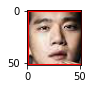

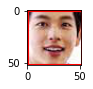

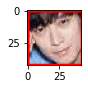

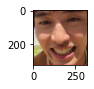

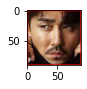

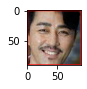

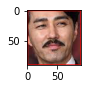

In [46]:
file_path = '/content/drive/MyDrive/Colab Notebooks/얼굴인식프로젝트/images/'

face_extract(file_path)